<a href="https://colab.research.google.com/github/BehshadR/Boston-Housing-Price-Prediction/blob/main/Boston_Housing_Price_Prediction_with_a_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [89]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Analysis

## Loading Data

In [90]:
(X_train , y_train) , (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing_npz' , 
                                                                           test_split = 0.2 , seed = 42)

## Data Exploration

In [91]:
# Checking the data shape and type
(X_train.shape, type(X_train)), (X_test.shape, type(X_test)), (y_train.shape, type(y_train)), (y_test.shape, type(y_test)),

(((404, 13), numpy.ndarray),
 ((102, 13), numpy.ndarray),
 ((404,), numpy.ndarray),
 ((102,), numpy.ndarray))

In [92]:
# Converting Data to DataFrame 
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [93]:
# Preview the data
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [94]:
# View summary of datasets
X_train_df.info()
print('_'*40)
X_test_df.info()
print('_'*40)
y_train_df.info()
print('_'*40)
y_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       102 non-null    float64
 1   1       102 non-null    float64
 2  

In [95]:
# distribution of numerical feature values across the samples
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Data Normalization

In [96]:
# Import Library
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [97]:
# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12])
)

In [98]:
# Transform training and test data with normalization (MinMaxScalar)
X_train_normal = ct.fit_transform(X_train_df)
X_test_normal = ct.transform(X_test_df)

In [99]:
# distribution of X_train feature values after normalization
pd.DataFrame(X_train_normal).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.042528,0.115681,0.394210,0.348815,0.521905,0.681970,0.241618,0.376560,0.423589,0.625737,0.897607,0.302511
std,0.102650,0.242696,0.253866,0.239522,0.138678,0.288719,0.194973,0.379829,0.323827,0.229502,0.232131,0.202740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.137860,0.444098,0.438465,0.087361,0.130435,0.179389,0.510638,0.944992,0.143481
50%,0.002881,0.000000,0.338343,0.314815,0.507568,0.768280,0.184767,0.173913,0.272901,0.691489,0.985892,0.267406
75%,0.041717,0.125000,0.646628,0.491770,0.586223,0.942585,0.362255,1.000000,0.914122,0.808511,0.997252,0.422954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model, Predict, Evaluation

## Deep Learning Model

In [100]:
# Set random seed
tf.random.set_seed(42)

# Building the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=10, activation='relu'),
  tf.keras.layers.Dense(units=100, activation='relu'),
  tf.keras.layers.Dense(units=1)
])

# Compiling the model
model.compile(loss = tf.keras.losses.mean_absolute_error,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
              metrics = ['mae'])

# Training the model
history = model.fit(X_train_normal, y_train_df, batch_size=32, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 21.7347 - mae: 21.7347
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 19.4288 - mae: 19.4288
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 14.4441 - mae: 14.4441
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 9.2092 - mae: 9.2092
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 8.1170 - mae: 8.1170
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 7.0457 - mae: 7.0457
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 6.2546 - mae: 6.2546
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 5.5588 - mae: 5.5588
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 5.1909 - mae: 5.1909
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 5.0354 - mae: 5.0354
Epoch 11/100
13/13 [==============================] -

In [101]:
# Preview the mean value of training and test data
y_train_df.mean(), y_test_df.mean()

(0    22.505693
 dtype: float64, 0    22.640196
 dtype: float64)

In [102]:
## Evaluate Model
model.evaluate(X_test_normal, y_test_df)

4/4 [==============================] - 0s 3ms/step - loss: 2.5615 - mae: 2.5615


[2.561485767364502, 2.561485767364502]

Text(0, 0.5, 'Loss')

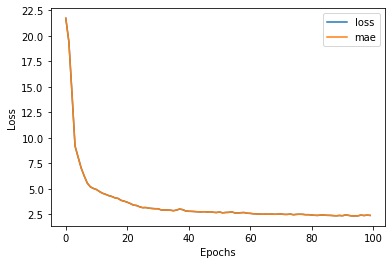

In [103]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')